# Zadanie 1 

## Autor: Albert Roethel

Importuję potrzebne pakiety

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
%matplotlib inline

In [2]:
df = pd.read_csv("python_zadanie_1.csv")
df.head()

,x,y,timestamp
0,8403.873843,-1175.733542,1.557152e+09
1,8404.164881,-1176.064284,1.557153e+09
2,8423.877784,-1216.390719,1.557152e+09
3,8424.049383,-1215.955073,1.557152e+09
4,8439.748979,-1168.257397,1.557152e+09


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5091 entries, 0 to 5090
Data columns (total 3 columns):
x            5091 non-null float64
y            5091 non-null float64
timestamp    5091 non-null float64
dtypes: float64(3)
memory usage: 119.4 KB


In [4]:
df.describe()

,x,y,timestamp
count,5091.000000,5091.000000,5.091000e+03
mean,8444.971524,-1179.343437,1.557152e+09
std,823.177869,707.833907,2.869689e+01
min,-6347.969394,-18586.628304,1.557152e+09
25%,8409.238083,-1213.976446,1.557152e+09
50%,8424.009246,-1176.280373,1.557152e+09
75%,8438.256035,-1171.872943,1.557152e+09
max,48014.850092,23032.782884,1.557153e+09


wartości kolumny timestamp są typu float - należy je przekształcić

In [5]:
pd.to_datetime(1557152492.6303444, unit="s")

Timestamp('2019-05-06 14:21:32.630344391')

korzystając z wbudowanej funkcji w pandas przekształcam floaty na obiekty typu timestamp

In [6]:
df["timestamp"] = df["timestamp"].apply(lambda x: pd.to_datetime(x, unit="s"))

In [7]:
df.head()

,x,y,timestamp
0,8403.873843,-1175.733542,2019-05-06 14:21:32.630344391
1,8404.164881,-1176.064284,2019-05-06 14:21:55.835305452
2,8423.877784,-1216.390719,2019-05-06 14:21:25.309193850
3,8424.049383,-1215.955073,2019-05-06 14:21:07.085614443
4,8439.748979,-1168.257397,2019-05-06 14:21:35.811506510


wygląda prawie okej, ale timestamp jest nieposorowany

In [8]:
df = df.sort_values(by=['timestamp']) 
df = df.reset_index(drop=True)

resetuję indeks aby było porządnie 

teraz mam wstępnie oczyszczone dane - można je więc zwizualizować

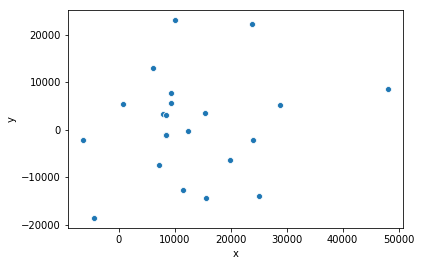

In [9]:
sns.scatterplot("x","y",data=df)

wykres wygląda podejrzanie - 5000 pomiarów a tylko kilkanaście punktów, w dodatku bardzo od siebie odległych

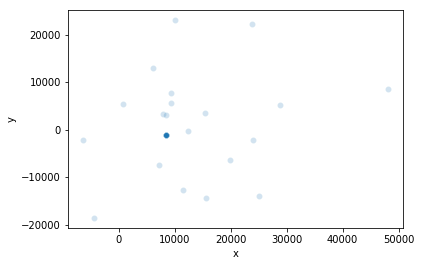

In [10]:
sns.scatterplot("x","y",data=df, alpha=0.2)

teraz widać, że w jednym punkcie było szczególnie dużo obserwacji ale może po prostu odstępy pomiędzy pomiarami były w tym punkcie na tyle krótkie że zrobiło się ich całkiem sporo albo pozostałe punkty to abberacje o których mowa była w poleceniu!

ograniczę wykres do fragmentu w którym jest najwięcej punktów

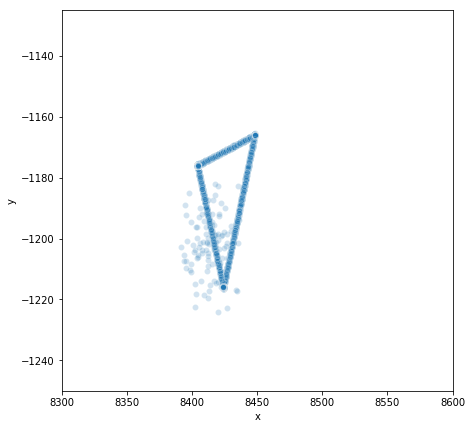

In [11]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(7,7)
ax.set_xlim(8300,8600)
ax.set_ylim(-1250, -1125)
sns.scatterplot("x","y",data=df, alpha=0.2)

Voila! Mamy trzy punkty

In [12]:
df = df.loc[(df.x > 8350) & (df.x < 8500) & (df.y < -1140) & (df.y > -1240)]
df = df.reset_index(drop=True)

Wyrzucam więc skrajne wartości z bazy danych

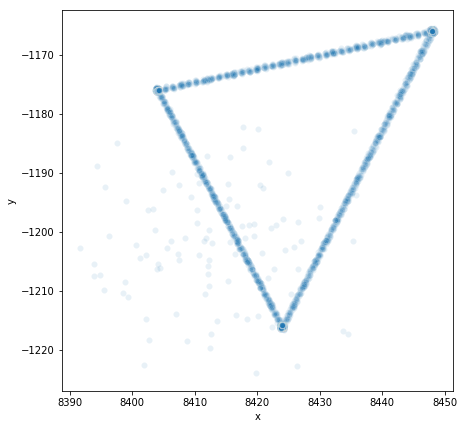

In [13]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(7,7)
sns.scatterplot("x","y",data=df, alpha=0.1)

Niestety nadal pozostaje sporo randomowych punktów które tworzą chmurę

A może tak miało być i po prostu czasami obserwowany punkt idzie okrężną drogą?
Aby to sprawdzić rysuję ten sam plot ale łacząc sąsiednie punkty

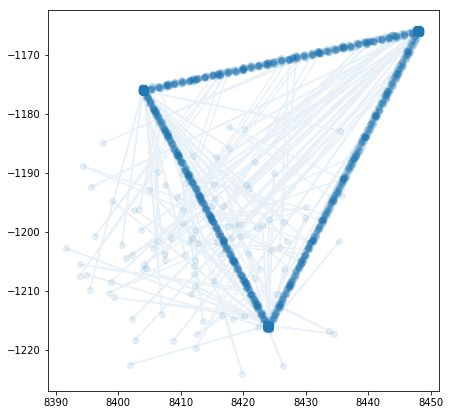

In [14]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(7,7)
plt.plot(df.x,df.y, '-o', alpha=0.1)

Niestety nie! Są to kolejne rezultaty niedoskonałości technologi zbierania danych o lokalizacji

Stworzę teraz kolejną kolumnę 'dist' która będzie przechowywała odległość od ostatniego punktu.

In [15]:
def pitagoras(x,y):
    return(math.sqrt(x**2+y**2))

def nppitagoras(df, x, y): # x i y to nazwy kolumn ramki danych przetrzymujących koordynaty
    return np.sqrt((df[x].shift(1) - df[x])**2 + (df[y].shift(1) - df[y])**2)

In [16]:
df["dist"] = nppitagoras(df, "x", "y")

In [17]:
df.head()

,x,y,timestamp,dist
0,8403.801639,-1176.038570,2019-05-06 14:20:23.156794548,NaN
1,8403.774549,-1175.993456,2019-05-06 14:20:23.176942110,0.052623
2,8403.796696,-1176.068151,2019-05-06 14:20:23.196812630,0.077909
3,8403.743995,-1176.017318,2019-05-06 14:20:23.216646194,0.073222
4,8403.727249,-1175.957844,2019-05-06 14:20:23.236554384,0.061786


In [18]:
print("std = ", np.std(df["dist"]))
print("mean = ", np.mean(df["dist"]))


std =  6.499322256976738
mean =  1.885407673896465


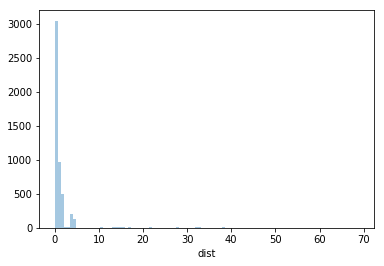

In [19]:
sns.distplot(df["dist"].dropna(), kde=False, bins=100)

w danych większość obserwacji jest oddalonych o maksymalnie 10 od poprzedniej obserwacji;

znaczna frakcja ma tę wartość bliską 0 - są to zapewne obserwacje z punktów postojowych

In [20]:
df[df["dist"] > 10].shape[0]/df.shape[0]

0.03628475645829225

Tylko 3% obserwacji jest oddalonych o >10 od poprzednich obserwacji


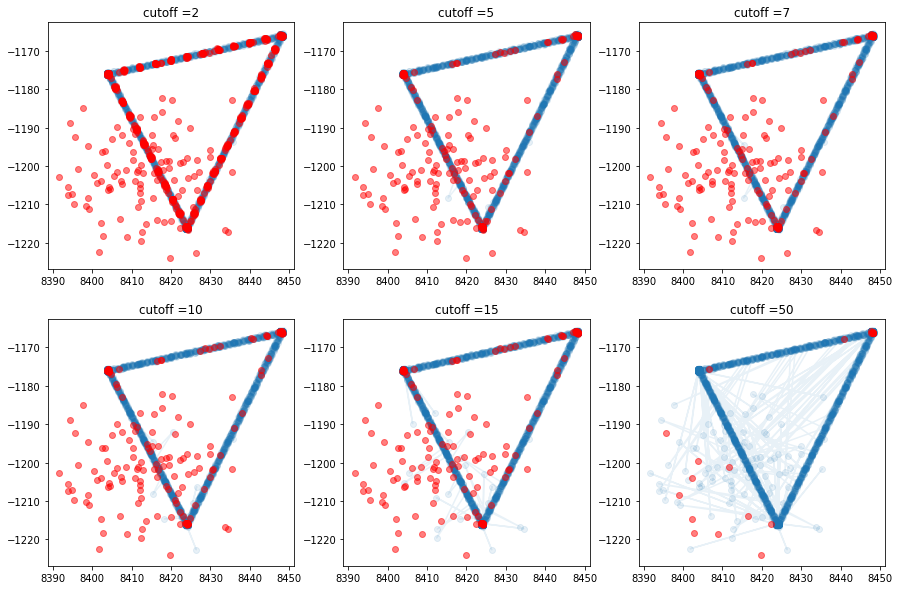

In [21]:
fig, ax = plt.subplots(2, 3) # ustawiam liczbę wykresów w rzędach i kolumnach
fig.set_size_inches(15,10) # romiar całości
for i, b in enumerate([2, 5, 7, 10, 15, 50]): # iteruję po róznych wartościach cutoffu
    # punkty nieusuwane będą na niebiesko
    ax.flatten()[i].plot(df[df["dist"] < b].x,df[df["dist"] < b].y, '-o', alpha=0.1)  
    # a punkty usuwane na czerwowno
    ax.flatten()[i].plot(df[df["dist"] > b].x,df[df["dist"] > b].y, 'o', alpha=0.5, c = "red")
    title = "cutoff = " + str(b)
    ax.flatten()[i].set_title(title)

Wykres przedstawia jakie punkty zostałyby usunięte gdybym zastosował dany cutoff (na czerwono punkty których odległość jest > cutoff; pozostałe są niebieskie) 

Dla cutoffu = 7 wygląda to względnie dobrze, ale wiele punktów na drodze pomiędzy stacjami (lub w stacjach) zostaje usuniętych.

Wynika to z tego, że gdy śledzony punkt przemieszcza się i następuje "teleportacja" (błąd gps) do innego miejsca a potem powrót to obie obserwacje będą miały bardzo wysoki dystans od poprzednika. Należy jednak usunąć tylko ten pierwszy co robi kod poiżej

In [22]:
cutoff = 7
for i in range(df.shape[0]): # dla każdej obserwacji
    if df.loc[i, "dist"] > cutoff: # sprawdzam czy jej odległosć od poprzedniej jest większa niż cutoff 
        df.drop(i, inplace=True) # jeśli tak to usuwam tę obserwację
        df.loc[i+1, "dist"] = pitagoras(df.loc[i+1, "x"]-df.loc[i-1,"x"], df.loc[i+1, "y"]-df.loc[i-1,"y"]) # updatuję odległość następnej

df = df.reset_index(drop=True) # poprawiam indeksy

<IPython.core.display.Javascript object>


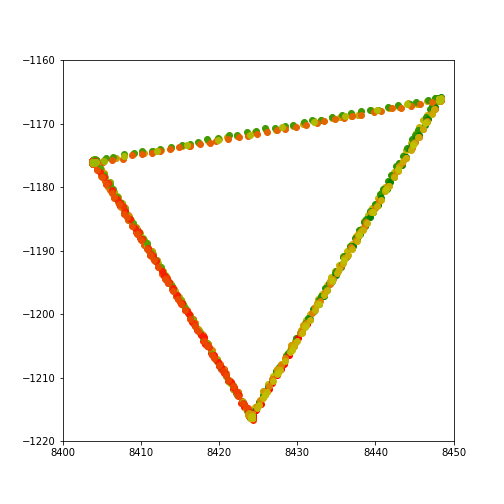

In [24]:
import matplotlib.animation as animation
from colour import Color
%matplotlib nbagg

red = Color("red")
colors = list(x.hex_l for x in red.range_to(Color("green"),1000))

Writer = animation.FFMpegWriter
writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(7,7)
ax.set_xlim(8400,8450)
ax.set_ylim(-1220, -1160)

def animate(i):
    plt.plot(df.loc[i][0], df.loc[i][1], '-o', color=colors[i % 1000])
        
ani = animation.FuncAnimation(fig, animate, repeat=True, interval=4)

# Jeśli animacja nie działa za pierwszym razem powinna dać się uruchomić za drugim/trzecim

Interaktywny wykres powyżej pokazuje drogę jaką w czasie pokonuje obserwowany obiekt. Aby lepiej zwizualizować drogę kolejne punkty cyklicznie zmieniają kolor między czerwonym a zielonym

In [25]:
df.head()

,x,y,timestamp,dist
0,8403.801639,-1176.038570,2019-05-06 14:20:23.156794548,NaN
1,8403.774549,-1175.993456,2019-05-06 14:20:23.176942110,0.052623
2,8403.796696,-1176.068151,2019-05-06 14:20:23.196812630,0.077909
3,8403.743995,-1176.017318,2019-05-06 14:20:23.216646194,0.073222
4,8403.727249,-1175.957844,2019-05-06 14:20:23.236554384,0.061786


tworzę kolumnę z różnicą czasu a z niej wyliczę prędkość w daym momencie

In [26]:
df["timediff"] =(df["timestamp"] - df["timestamp"].shift(1)).dt.total_seconds()

In [27]:
df.head()

,x,y,timestamp,dist,timediff
0,8403.801639,-1176.038570,2019-05-06 14:20:23.156794548,NaN,NaN
1,8403.774549,-1175.993456,2019-05-06 14:20:23.176942110,0.052623,0.020148
2,8403.796696,-1176.068151,2019-05-06 14:20:23.196812630,0.077909,0.019871
3,8403.743995,-1176.017318,2019-05-06 14:20:23.216646194,0.073222,0.019834
4,8403.727249,-1175.957844,2019-05-06 14:20:23.236554384,0.061786,0.019908


In [28]:
df["speed"] = df["dist"] / df["timediff"]

In [29]:
df.head()

,x,y,timestamp,dist,timediff,speed
0,8403.801639,-1176.038570,2019-05-06 14:20:23.156794548,NaN,NaN,NaN
1,8403.774549,-1175.993456,2019-05-06 14:20:23.176942110,0.052623,0.020148,2.611903
2,8403.796696,-1176.068151,2019-05-06 14:20:23.196812630,0.077909,0.019871,3.920854
3,8403.743995,-1176.017318,2019-05-06 14:20:23.216646194,0.073222,0.019834,3.691798
4,8403.727249,-1175.957844,2019-05-06 14:20:23.236554384,0.061786,0.019908,3.103557


/home/albert/.local/lib/python3.5/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


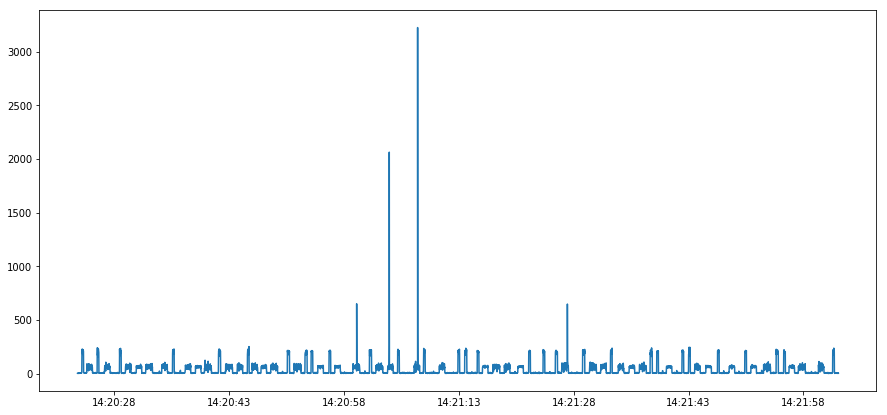

In [30]:
%matplotlib inline
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,7)
plt.plot(df.timestamp,df.speed, '-') 


Wykres szybkości od czasu - w niektórych momentach przyspieszenie musiało być zabójcze ;)

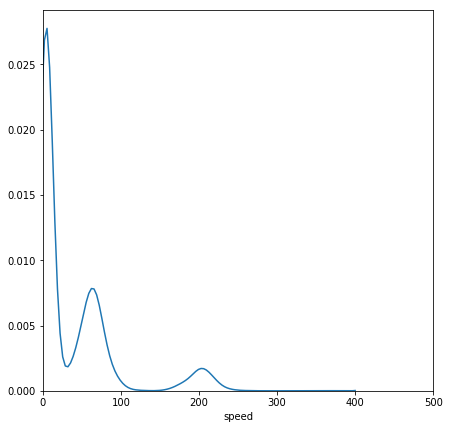

In [31]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(7,7)
ax.set_xlim(0, 500)
sns.distplot(df[df["speed"] < 500]["speed"].dropna(), hist=False)


Histogram pokazujący rozkład prędkości dla obserwacji. Wyraźnie widać trzy różne klasy prędkości. 
Najliczniejsza to prędkość bliska 0 (oczywiście będzie to pewnie prędkść w punktach postojowych). Pozostałe dwie maja prędkości około 80 i 200. 

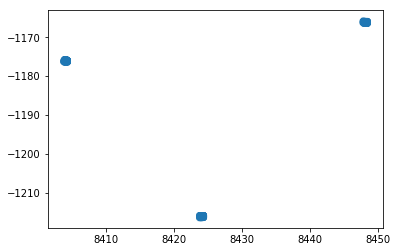

In [32]:
tmp = df
tmp = tmp[(tmp["speed"] < 7) | (tmp["speed"].isnull())]
plt.scatter(tmp["x"], tmp["y"], alpha = 0.1)

Stworzyłem tymaczsową ramkę danych z obserwacjami których szybkość jest < 7

Otrzymałęm w ten sposób trzy skupiska punktów - postoje.

Chciałbym wyznaczyć ich współrzędne. Jest to jednak problematyczne bo w punktach postojowych każdy unkt ma inne współrzędne.

Skorzystam więc z algorytmu K średnich i wyliczę współrzędne środków każdego postoju. Dodatkowo zaklasyfikuję obserwacje do trzech klastrów.

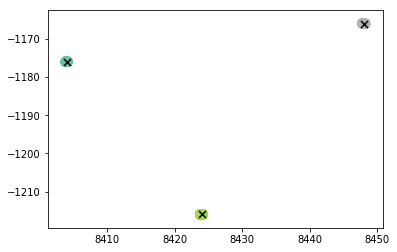

In [33]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3) # tworzę obiekt klast KMeans i ustawiam trzy klastry
kmeans.fit(tmp[["x", "y"]]) # wprowadzam dane
y_kmeans = kmeans.predict(tmp[["x", "y"]]) # klasyfikuję każdy punkt do postoju
%matplotlib inline
plt.scatter(tmp["x"], tmp["y"], c=y_kmeans, s=50, cmap='Set2') 
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, marker="x") # zaznaczam centra znakiem "x"

centers = {"0":centers[0], "1":centers[1], "2":centers[2]}

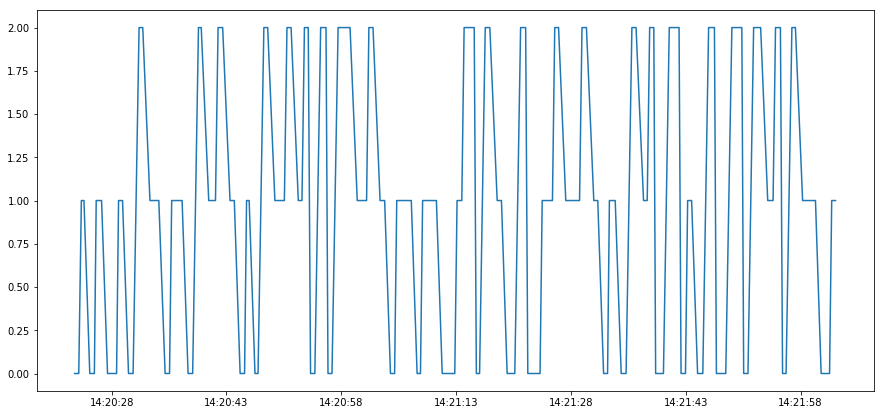

In [34]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,7)
plt.plot(tmp["timestamp"], y_kmeans)

Na wykresie widać ładne przejścia z jenedgo punktu do drugiego jako funkcja czasu.

In [35]:
for k, v in centers.items():
    print("Współrzędne punktu postojowego {} to x={}, y={}".format(k, v[0], v[1]))


Współrzędne punktu postojowego 2 to x=8448.028171328633, y=-1166.0314054529238
Współrzędne punktu postojowego 0 to x=8404.022808129286, y=-1175.9719517958436
Współrzędne punktu postojowego 1 to x=8424.000246783104, y=-1215.9793595302826


In [36]:
tmp["position"] = y_kmeans.astype('str')

/home/albert/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Teraz policzę średnią odległość od punktów postojowych na jakie oddala się obserwowany obiekt na podstawie danych z KMeans

0.209846060030212
0.2286795557007699
0.24817792626800605


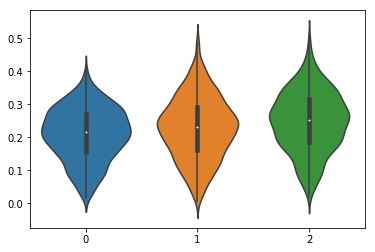

In [37]:
dists=[]
for pos in ["0", "1", "2"]:
    a = tmp[tmp["position"] == pos]
    dists.append(np.sqrt((a.x - centers[pos][0])**2 + (a.y - centers[pos][1])**2))

for i in dists:
    print(np.mean(i))
sns.violinplot(data=dists)

Średnia odległość od centrum wynosi w każdym przypadku około 0.22. Na violinplocie widać, że wszystkie obserwacje są oddalone od centrum o co najwyżej 0.6

Zatem jako cutoff od centrów przyjmuję 0.6. Tzn jeśli odległość od centrum będzie większa to nie uważam aby obserwowany punkt był w postoju.

In [38]:
df["position"] = "x"
cutoff = 0.6
for pos in ["0", "1", "2"]:
    df.loc[np.sqrt((df.x - centers[pos][0])**2 + (df.y - centers[pos][1])**2) < cutoff, "position"] = pos

mam teraz data frame z koordynatami pomiarów i przypisaniu ich do pozycji (w przypadku poruszania się pozycja == "x")

Teraz tworzę ramkę danych z informacjami o podróżach pomiędzy stacjami i postojach na nich

In [39]:
start = 0  # indykator gdzie zacząłem
current = df.loc[0]["position"] # obecny stan (x - w podróży, "1"/"2"/"3" - postój na stacji)
travels = pd.DataFrame(columns=["from", "to", "starttime", "distance"])

for i in range(df.shape[0]-1): # dla każdej obserwacji
    if current == df.loc[i+1]["position"]: # sprawdzam czy w następnym kroku stan podróży będzie taki sam
        continue # jeśli tak to przechodzę do następnej
    # jeśli nie to sprawdzam czy:
    if current != "x": # wychodzę ze stacji
        # jeśli tak to dodaję do travels pozycję startu wraz z jego czasem, obecną pozycję i wyliczam odległość
        travels.loc[travels.shape[0]] = [df.loc[start]["position"], 
                                            df.loc[i]["position"],
                                            df.loc[start]["timestamp"],
                                            pitagoras(df.loc[start]["x"]-df.loc[i]["x"], df.loc[start]["y"]-df.loc[i]["y"],),
                                            ]
        start = i
        current = "x"
    else: # wchodzę do stacji
        travels.loc[travels.shape[0]] = [df.loc[start]["position"], # dodaje do travels wiersze od momentu wyjścia ze stacji i wejścia do niej
                                            df.loc[i+1]["position"],
                                            df.loc[start]["timestamp"],
                                            pitagoras(df.loc[start]["x"]-df.loc[i]["x"], df.loc[start]["y"]-df.loc[i]["y"],),
                                            ]
        start = i+1
        current = df.loc[i+1]["position"]


Uzupełniam informacje dotyczące tego ile czasu obiekt spędził na podróży/postoju oraz prędkość

In [40]:
travels["timespend"] = ( travels["starttime"].shift(-1) - travels["starttime"]).dt.total_seconds()
travels["speed"] = travels["distance"] / travels["timespend"]

In [41]:
travels.head()

,from,to,starttime,distance,timespend,speed
0,0,0,2019-05-06 14:20:23.156794548,0.132994,0.579987,0.229305
1,0,1,2019-05-06 14:20:23.736781359,40.657314,0.220030,184.780719
2,1,1,2019-05-06 14:20:23.956811428,0.119056,0.440371,0.270354
3,1,0,2019-05-06 14:20:24.397182703,43.999121,0.719950,61.114097
4,0,0,2019-05-06 14:20:25.117133141,0.121481,0.620027,0.195929


In [42]:
tmp = travels[travels["from"] == travels["to"]] 
for i in ["0", "1", "2"]:
    print("średni czas spędzony w punkcie postojowym", i, "to:", np.mean(tmp[tmp["from"] == i]["timespend"]), "s")
tmp.drop("to", axis=1)
tmp.rename(columns={'from':'position'}, inplace=True)

średni czas spędzony w punkcie postojowym 0 to: 0.7929758262400002 s
średni czas spędzony w punkcie postojowym 1 to: 0.9660536347500002 s
średni czas spędzony w punkcie postojowym 2 to: 0.7682792705 s


/home/albert/.local/lib/python3.5/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [43]:
pd.pivot_table(tmp, values ="timespend", index = ["position"],  aggfunc=[np.mean, np.std, np.count_nonzero])

,mean,std,count_nonzero
,timespend,timespend,timespend
position,,,
0,0.792976,0.362398,25.0
1,0.966054,0.503993,24.0
2,0.768279,0.332817,22.0


Czas spędzony na każdej stacji wraz z odchyleniem standardowym w formie pivot table

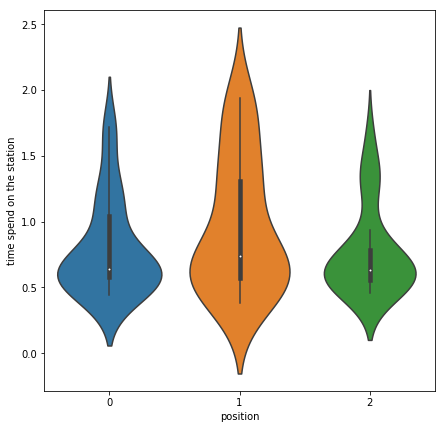

In [44]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(7,7)
sns.violinplot(x="position", y="timespend", data=tmp, scale="count")
ax.set_ylabel("time spend on the station")

Wizualizacja danych wyżej. Szerokość każdego violina jest proporjonalna do ilości zaobserwowanych punktów na danej stacji - najczęściej odwiedzana stacja była stacja 2

Pora teraz na przetworzenie danych związanych z przemieszczaniem się

In [45]:
tmp = travels[travels["from"] != travels["to"]]
tmp["path"] = tmp["from"] + "->" +  tmp["to"]
tmp = tmp.drop(["from", "to"], axis=1)

/home/albert/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [46]:
pd.pivot_table(tmp, values ="speed", index = ["path"],  aggfunc=[np.mean, np.std, np.count_nonzero])

,mean,std,count_nonzero
,speed,speed,speed
path,,,
0->1,184.686910,2.242287,12.0
0->2,60.999603,0.470812,13.0
1->0,60.502949,0.407516,15.0
1->2,183.965483,1.036801,9.0
2->0,186.234747,1.677632,9.0
2->1,60.453771,0.609242,13.0


wyszła ciekawa zależność - jeśli poruszamy się w kierunku 0 -> 1 -> 2 -> 0 ... to prędkość jest około 60 m/s natomiast w kierunku przeciwnym prędkość wynosi około 183 m/s

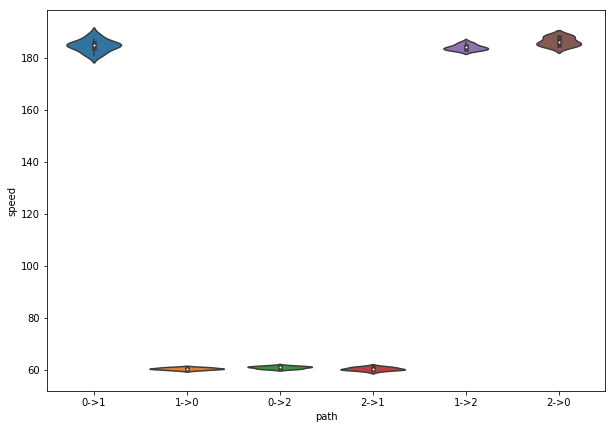

In [47]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10,7)
sns.violinplot(x="path", y="speed", data=tmp, scale="count")
ax.set_xlabel("path")
ax.set_ylabel("speed")